# Taking raw .csv files and converting them to Pandas DataFrames

In [47]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Mon Apr 26 10:00:02 2021


### Use Pandas to read in your file and change column names to more useful labels. 

In [42]:
### This box uploads all information and renames the columns based on the naming conventions used by the TimePix file creation system. 
### In new experiments there may be more or less columns, or they may be differently named. 
### It is important to check all errors and that the resulting DataFrame makes sense and has all expected information. 
filename = 'yscan/yscan_153'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

,y,x,time,center flux,cluster size
0,91,13,0,700,3
1,149,52,7197184,2875,6
2,87,33,9856768,525,3
3,80,44,12249600,1350,7
4,92,47,13745920,2725,7
...,...,...,...,...,...
1399206,87,36,16593836543232,1000,5
1399207,130,107,16593837268992,2650,35
1399208,84,58,16593840417536,3275,8
1399209,85,28,16593841742592,1575,5


### Save the DataFrame
I keep this next cell commented unless I am sure I want to change the file in my directory. 

In [43]:
new_filename = 'yscan/yscan_153'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,91,13,0,700,3
1,149,52,7197184,2875,6
2,87,33,9856768,525,3
3,80,44,12249600,1350,7
4,92,47,13745920,2725,7
...,...,...,...,...,...
1399206,87,36,16593836543232,1000,5
1399207,130,107,16593837268992,2650,35
1399208,84,58,16593840417536,3275,8
1399209,85,28,16593841742592,1575,5


### Finding Ions

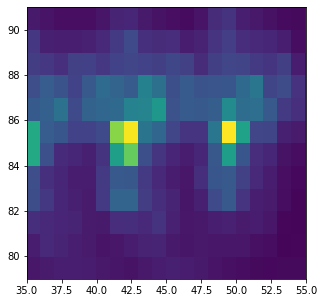

In [66]:
# This cell is used to see an image of the ions. Helpful to make sure ions did not move (blurry) and that there weren't spatial errors 
# Helpful also to identify the locaitons of the ions.
plt.figure(figsize=(5, 5))
filename = 'yscan/yscan_153'
it = pd.read_csv(filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
x_guess = 45
y_guess = 85
plt.xlim(x_guess-10,x_guess+10)
plt.ylim(y_guess-6, y_guess+6)
x1 = 30; y1 = 84
x2 = 38; y2 = 85
x3 = 45; y3 = 85
x4 = 52; y4 = 85 
x5 = 73; y5 = 85
x6 = 64; y6 = 86 
x7 = 68; y7 = 84
x8 = 73; y8 = 86
x9 = 79; y9 = 85 
#plt.savefig('Ions.svg')

# Eliminate blank space
Use this code to eliminate sections in which the crystal melted and the data was 'ion soup'. That type of data does nothing but introduce error. 

In [45]:
filename = 'yscan/yscan_153'
it = pd.read_csv(filename)  
it = it.drop(columns = {'Unnamed: 0'})
it

,y,x,time,center flux,cluster size
0,91,13,0,700,3
1,149,52,7197184,2875,6
2,87,33,9856768,525,3
3,80,44,12249600,1350,7
4,92,47,13745920,2725,7
...,...,...,...,...,...
1399206,87,36,16593836543232,1000,5
1399207,130,107,16593837268992,2650,35
1399208,84,58,16593840417536,3275,8
1399209,85,28,16593841742592,1575,5


These next few cells are confusing. Use the top cell to identify the exact locations of melted crystal or empty space. Then use the second cell to remove the space between and bridge the gap in time to make it appear as if there was no melting. It's like stitching the sections together. The third cell is just a verification. And the last cell changes the Pandas Dataframe that is saved in the directory. 

(0.0, 16593847394048.0)

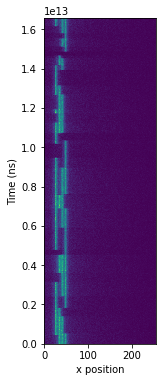

In [46]:
# Check the data over time to see if there are times in which the chain is broken or melted. 
# Find start and end of the broken crystal times and plug that into the start and end variables. 
fig, (ax0) = plt.subplots(ncols=1, figsize=(2,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)

In [88]:

it = it.query(f'{start} > time or time > {end}')
times = np.array(it['time'])
new_times = []
for i in range(len(times)):
    if times[i] > start :
        new_times.append(times[i] - duration)
    else:
        new_times.append(times[i])
        
it['time'] = new_times


/home/maverickmillican/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


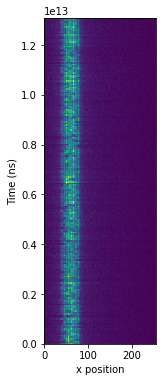

In [89]:
# Verify that the changes actually happend
fig, (ax0) = plt.subplots(ncols=1, figsize=(2,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 200])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')


start = it['time'].min(); end = it['time'].max()
#ax0.set_ylim(start, end)

### Change the actual file again to exist without 'ion soup'

In [90]:

#it.to_csv(filename)  ##### changes actual file
